# 檢視與處理 Outliers
### 為何會有 outliers, 常見的 outlier 原因
* 未知值，隨意填補 (約定俗成的代入)，如年齡常見 0,999
* 可能的錯誤紀錄/手誤/系統性錯誤，如某本書在某筆訂單的銷售量 = 1000 本

In [177]:
# Import 需要的套件
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

%matplotlib inline

# 設定 data_path
dir_data = './data'

In [178]:
f_app = os.path.join(dir_data, 'application_train.csv')
print('Path of read in data: %s' % (f_app))
app_train = pd.read_csv(f_app)
app_train.head()

Path of read in data: ./data\application_train.csv


,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


## 請參考 HomeCredit_columns_description.csv 的欄位說明，觀察並列出三個你覺得可能有 outlier 的欄位並解釋可能的原因

In [179]:
print(app_train.dtypes)

SK_ID_CURR                      int64
TARGET                          int64
NAME_CONTRACT_TYPE             object
CODE_GENDER                    object
FLAG_OWN_CAR                   object
FLAG_OWN_REALTY                object
CNT_CHILDREN                    int64
AMT_INCOME_TOTAL              float64
AMT_CREDIT                    float64
AMT_ANNUITY                   float64
AMT_GOODS_PRICE               float64
NAME_TYPE_SUITE                object
NAME_INCOME_TYPE               object
NAME_EDUCATION_TYPE            object
NAME_FAMILY_STATUS             object
NAME_HOUSING_TYPE              object
REGION_POPULATION_RELATIVE    float64
DAYS_BIRTH                      int64
DAYS_EMPLOYED                   int64
DAYS_REGISTRATION             float64
DAYS_ID_PUBLISH                 int64
OWN_CAR_AGE                   float64
FLAG_MOBIL                      int64
FLAG_EMP_PHONE                  int64
FLAG_WORK_PHONE                 int64
FLAG_CONT_MOBILE                int64
FLAG_PHONE  

['AMT_INCOME_TOTAL', 'AMT_CREDIT', 'AMT_ANNUITY', 'AMT_GOODS_PRICE', 'REGION_POPULATION_RELATIVE', 'DAYS_REGISTRATION', 'OWN_CAR_AGE', 'CNT_FAM_MEMBERS', 'EXT_SOURCE_1', 'EXT_SOURCE_2', 'EXT_SOURCE_3', 'APARTMENTS_AVG', 'BASEMENTAREA_AVG', 'YEARS_BEGINEXPLUATATION_AVG', 'YEARS_BUILD_AVG', 'COMMONAREA_AVG', 'ELEVATORS_AVG', 'ENTRANCES_AVG', 'FLOORSMAX_AVG', 'FLOORSMIN_AVG', 'LANDAREA_AVG', 'LIVINGAPARTMENTS_AVG', 'LIVINGAREA_AVG', 'NONLIVINGAPARTMENTS_AVG', 'NONLIVINGAREA_AVG', 'APARTMENTS_MODE', 'BASEMENTAREA_MODE', 'YEARS_BEGINEXPLUATATION_MODE', 'YEARS_BUILD_MODE', 'COMMONAREA_MODE', 'ELEVATORS_MODE', 'ENTRANCES_MODE', 'FLOORSMAX_MODE', 'FLOORSMIN_MODE', 'LANDAREA_MODE', 'LIVINGAPARTMENTS_MODE', 'LIVINGAREA_MODE', 'NONLIVINGAPARTMENTS_MODE', 'NONLIVINGAREA_MODE', 'APARTMENTS_MEDI', 'BASEMENTAREA_MEDI', 'YEARS_BEGINEXPLUATATION_MEDI', 'YEARS_BUILD_MEDI', 'COMMONAREA_MEDI', 'ELEVATORS_MEDI', 'ENTRANCES_MEDI', 'FLOORSMAX_MEDI', 'FLOORSMIN_MEDI', 'LANDAREA_MEDI', 'LIVINGAPARTMENTS_MEDI',

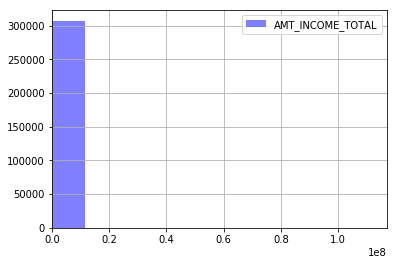

>>> next
column [ AMT_CREDIT ] -  min:  45000.0
column [ AMT_CREDIT ] -  max:  4050000.0
column [ AMT_CREDIT ] - mean:  599025.9997057016
column [ AMT_CREDIT ] -  std:  402490.776995946


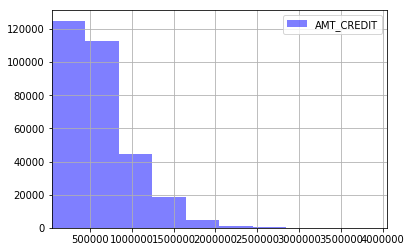

>>> next
column [ AMT_ANNUITY ] -  min:  1615.5
column [ AMT_ANNUITY ] -  max:  258025.5
column [ AMT_ANNUITY ] - mean:  27108.573909183444
column [ AMT_ANNUITY ] -  std:  14493.737315117392


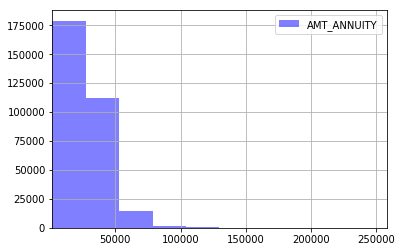

>>> next
column [ AMT_GOODS_PRICE ] -  min:  40500.0
column [ AMT_GOODS_PRICE ] -  max:  4050000.0
column [ AMT_GOODS_PRICE ] - mean:  538396.2074288895
column [ AMT_GOODS_PRICE ] -  std:  369446.4605400129


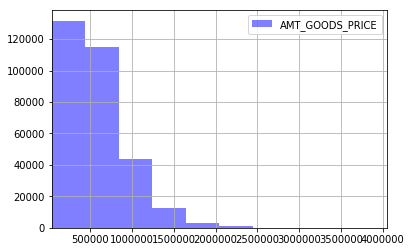

>>> next
column [ REGION_POPULATION_RELATIVE ] -  min:  0.00029
column [ REGION_POPULATION_RELATIVE ] -  max:  0.072508
column [ REGION_POPULATION_RELATIVE ] - mean:  0.02086811205778947
column [ REGION_POPULATION_RELATIVE ] -  std:  0.013831280122699869


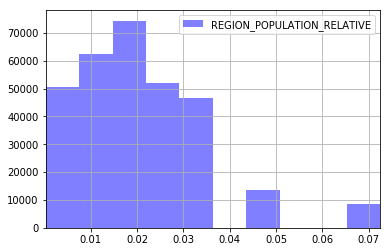

>>> next
column [ DAYS_REGISTRATION ] -  min:  -24672.0
column [ DAYS_REGISTRATION ] -  max:  0.0
column [ DAYS_REGISTRATION ] - mean:  -4986.120327538419
column [ DAYS_REGISTRATION ] -  std:  3522.88632096305


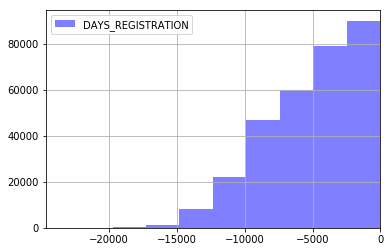

>>> next
column [ OWN_CAR_AGE ] -  min:  0.0
column [ OWN_CAR_AGE ] -  max:  91.0
column [ OWN_CAR_AGE ] - mean:  12.061090818687727
column [ OWN_CAR_AGE ] -  std:  11.944811582242346


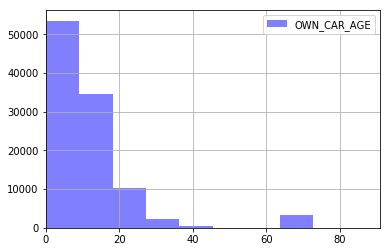

>>> next
column [ CNT_FAM_MEMBERS ] -  min:  1.0
column [ CNT_FAM_MEMBERS ] -  max:  20.0
column [ CNT_FAM_MEMBERS ] - mean:  2.152665450442101
column [ CNT_FAM_MEMBERS ] -  std:  0.9106815691773334


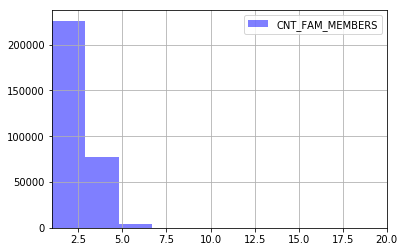

>>> next
column [ EXT_SOURCE_1 ] -  min:  0.014568132412445587
column [ EXT_SOURCE_1 ] -  max:  0.962692770561306
column [ EXT_SOURCE_1 ] - mean:  0.5021298056566621
column [ EXT_SOURCE_1 ] -  std:  0.21106224927392553


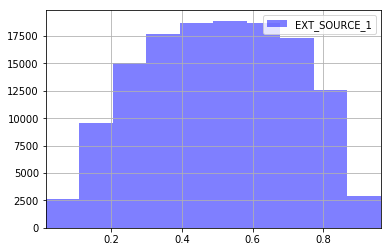

>>> next
column [ EXT_SOURCE_2 ] -  min:  8.173616518884397e-08
column [ EXT_SOURCE_2 ] -  max:  0.8549996664047012
column [ EXT_SOURCE_2 ] - mean:  0.5143926741308463
column [ EXT_SOURCE_2 ] -  std:  0.1910601549849387


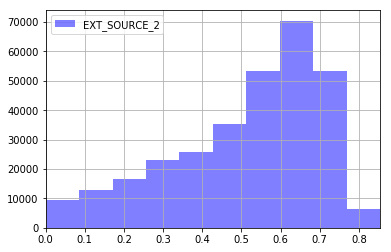

>>> next
column [ EXT_SOURCE_3 ] -  min:  0.0005272652387098817
column [ EXT_SOURCE_3 ] -  max:  0.8960095494948396
column [ EXT_SOURCE_3 ] - mean:  0.5108529061800121
column [ EXT_SOURCE_3 ] -  std:  0.19484436446376072


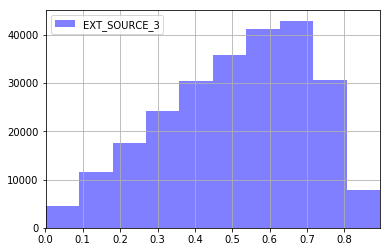

>>> next
column [ APARTMENTS_AVG ] -  min:  0.0
column [ APARTMENTS_AVG ] -  max:  1.0
column [ APARTMENTS_AVG ] - mean:  0.11744049917466033
column [ APARTMENTS_AVG ] -  std:  0.10824029130030667


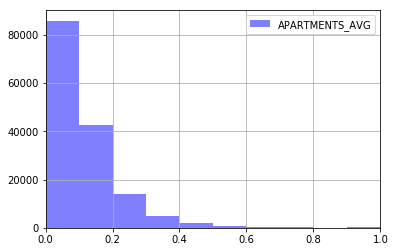

>>> next
column [ BASEMENTAREA_AVG ] -  min:  0.0
column [ BASEMENTAREA_AVG ] -  max:  1.0
column [ BASEMENTAREA_AVG ] - mean:  0.08844221905180052
column [ BASEMENTAREA_AVG ] -  std:  0.08243815873569478


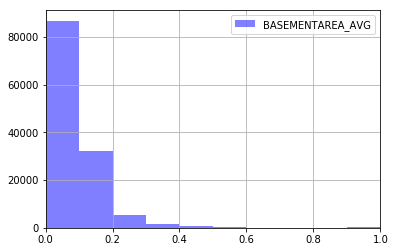

>>> next
column [ YEARS_BEGINEXPLUATATION_AVG ] -  min:  0.0
column [ YEARS_BEGINEXPLUATATION_AVG ] -  max:  1.0
column [ YEARS_BEGINEXPLUATATION_AVG ] - mean:  0.9777348581622732
column [ YEARS_BEGINEXPLUATATION_AVG ] -  std:  0.05922331435835884


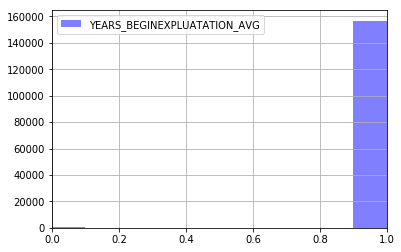

>>> next
column [ YEARS_BUILD_AVG ] -  min:  0.0
column [ YEARS_BUILD_AVG ] -  max:  1.0
column [ YEARS_BUILD_AVG ] - mean:  0.752471432592686
column [ YEARS_BUILD_AVG ] -  std:  0.11327992663225028


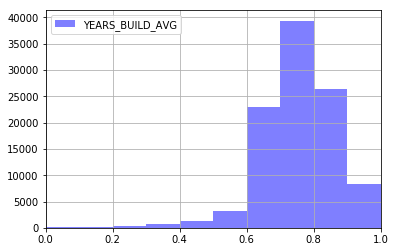

>>> next
column [ COMMONAREA_AVG ] -  min:  0.0
column [ COMMONAREA_AVG ] -  max:  1.0
column [ COMMONAREA_AVG ] - mean:  0.04462071541135205
column [ COMMONAREA_AVG ] -  std:  0.0760357450504098


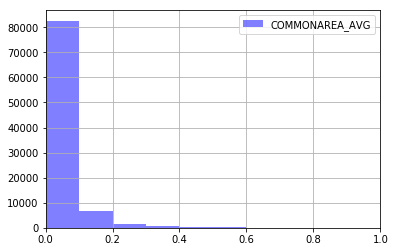

>>> next
column [ ELEVATORS_AVG ] -  min:  0.0
column [ ELEVATORS_AVG ] -  max:  1.0
column [ ELEVATORS_AVG ] - mean:  0.07894151232418305
column [ ELEVATORS_AVG ] -  std:  0.13457600110026235


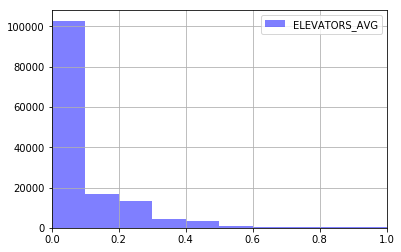

>>> next
column [ ENTRANCES_AVG ] -  min:  0.0
column [ ENTRANCES_AVG ] -  max:  1.0
column [ ENTRANCES_AVG ] - mean:  0.1497246700681123
column [ ENTRANCES_AVG ] -  std:  0.1000491207603038


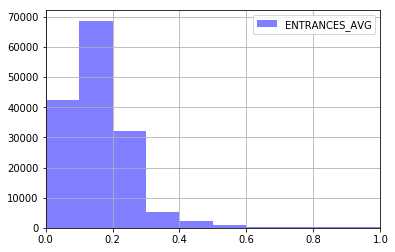

>>> next
column [ FLOORSMAX_AVG ] -  min:  0.0
column [ FLOORSMAX_AVG ] -  max:  1.0
column [ FLOORSMAX_AVG ] - mean:  0.2262819070368362
column [ FLOORSMAX_AVG ] -  std:  0.14464069954794426


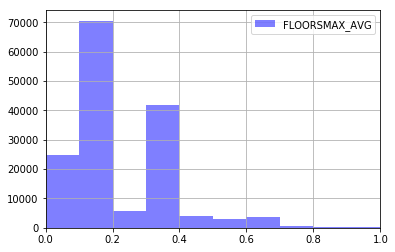

>>> next
column [ FLOORSMIN_AVG ] -  min:  0.0
column [ FLOORSMIN_AVG ] -  max:  1.0
column [ FLOORSMIN_AVG ] - mean:  0.23189350049050692
column [ FLOORSMIN_AVG ] -  std:  0.161380288800189


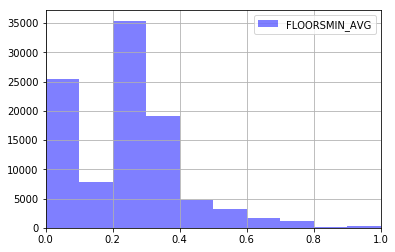

>>> next
column [ LANDAREA_AVG ] -  min:  0.0
column [ LANDAREA_AVG ] -  max:  1.0
column [ LANDAREA_AVG ] - mean:  0.06633318417239835
column [ LANDAREA_AVG ] -  std:  0.0811836407017809


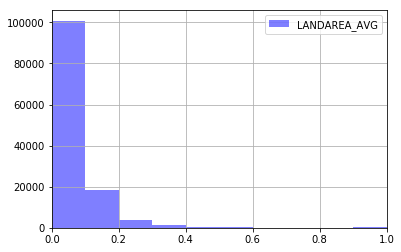

>>> next
column [ LIVINGAPARTMENTS_AVG ] -  min:  0.0
column [ LIVINGAPARTMENTS_AVG ] -  max:  1.0
column [ LIVINGAPARTMENTS_AVG ] - mean:  0.10077477495068154
column [ LIVINGAPARTMENTS_AVG ] -  std:  0.09257613396049696


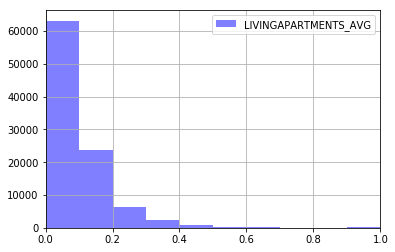

>>> next
column [ LIVINGAREA_AVG ] -  min:  0.0
column [ LIVINGAREA_AVG ] -  max:  1.0
column [ LIVINGAREA_AVG ] - mean:  0.10739901933259607
column [ LIVINGAREA_AVG ] -  std:  0.11056452318371773


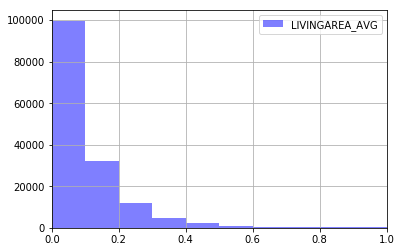

>>> next
column [ NONLIVINGAPARTMENTS_AVG ] -  min:  0.0
column [ NONLIVINGAPARTMENTS_AVG ] -  max:  1.0
column [ NONLIVINGAPARTMENTS_AVG ] - mean:  0.008808672617213057
column [ NONLIVINGAPARTMENTS_AVG ] -  std:  0.047731662050336146


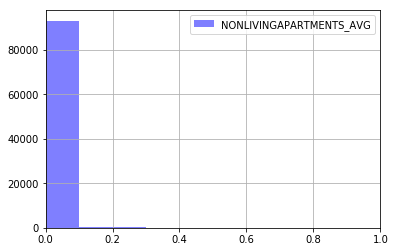

>>> next
column [ NONLIVINGAREA_AVG ] -  min:  0.0
column [ NONLIVINGAREA_AVG ] -  max:  1.0
column [ NONLIVINGAREA_AVG ] - mean:  0.02835775707579772
column [ NONLIVINGAREA_AVG ] -  std:  0.06952318332120722


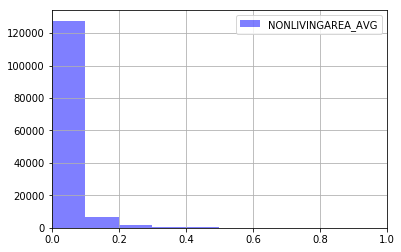

>>> next
column [ APARTMENTS_MODE ] -  min:  0.0
column [ APARTMENTS_MODE ] -  max:  1.0
column [ APARTMENTS_MODE ] - mean:  0.11423100693296864
column [ APARTMENTS_MODE ] -  std:  0.10793603908753796


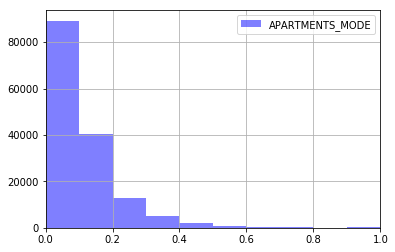

>>> next
column [ BASEMENTAREA_MODE ] -  min:  0.0
column [ BASEMENTAREA_MODE ] -  max:  1.0
column [ BASEMENTAREA_MODE ] - mean:  0.08754321224758604
column [ BASEMENTAREA_MODE ] -  std:  0.08430717486923314


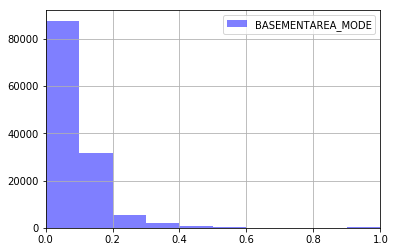

>>> next
column [ YEARS_BEGINEXPLUATATION_MODE ] -  min:  0.0
column [ YEARS_BEGINEXPLUATATION_MODE ] -  max:  1.0
column [ YEARS_BEGINEXPLUATATION_MODE ] - mean:  0.9770653729428284
column [ YEARS_BEGINEXPLUATATION_MODE ] -  std:  0.06457543708049779


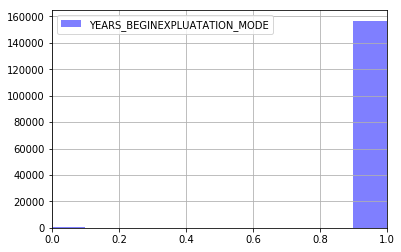

>>> next
column [ YEARS_BUILD_MODE ] -  min:  0.0
column [ YEARS_BUILD_MODE ] -  max:  1.0
column [ YEARS_BUILD_MODE ] - mean:  0.759637322733821
column [ YEARS_BUILD_MODE ] -  std:  0.11011102734194693


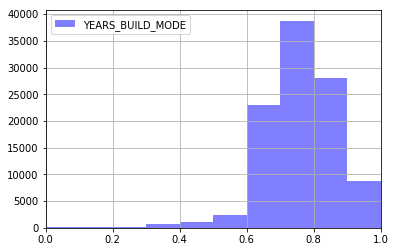

>>> next
column [ COMMONAREA_MODE ] -  min:  0.0
column [ COMMONAREA_MODE ] -  max:  1.0
column [ COMMONAREA_MODE ] - mean:  0.042553137750146755
column [ COMMONAREA_MODE ] -  std:  0.07444452253838403


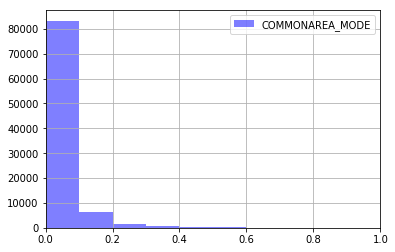

>>> next
column [ ELEVATORS_MODE ] -  min:  0.0
column [ ELEVATORS_MODE ] -  max:  1.0
column [ ELEVATORS_MODE ] - mean:  0.07448973610915821
column [ ELEVATORS_MODE ] -  std:  0.1322561441504732


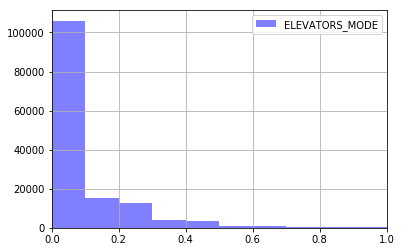

>>> next
column [ ENTRANCES_MODE ] -  min:  0.0
column [ ENTRANCES_MODE ] -  max:  1.0
column [ ENTRANCES_MODE ] - mean:  0.14519265864574382
column [ ENTRANCES_MODE ] -  std:  0.1009769881602024


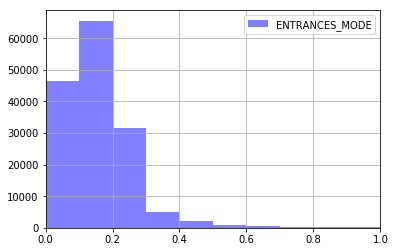

>>> next
column [ FLOORSMAX_MODE ] -  min:  0.0
column [ FLOORSMAX_MODE ] -  max:  1.0
column [ FLOORSMAX_MODE ] - mean:  0.22231504747867964
column [ FLOORSMAX_MODE ] -  std:  0.1437094065953209


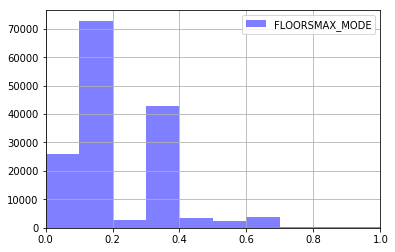

>>> next
column [ FLOORSMIN_MODE ] -  min:  0.0
column [ FLOORSMIN_MODE ] -  max:  1.0
column [ FLOORSMIN_MODE ] - mean:  0.22805849255070593
column [ FLOORSMIN_MODE ] -  std:  0.16115977149541197


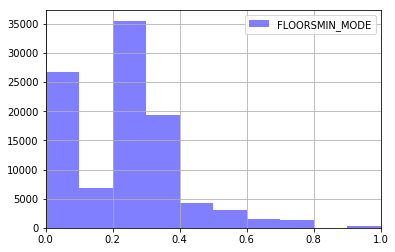

>>> next
column [ LANDAREA_MODE ] -  min:  0.0
column [ LANDAREA_MODE ] -  max:  1.0
column [ LANDAREA_MODE ] - mean:  0.06495768445657842
column [ LANDAREA_MODE ] -  std:  0.08175027780844098


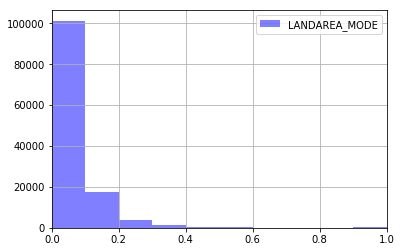

>>> next
column [ LIVINGAPARTMENTS_MODE ] -  min:  0.0
column [ LIVINGAPARTMENTS_MODE ] -  max:  1.0
column [ LIVINGAPARTMENTS_MODE ] - mean:  0.1056448567494209
column [ LIVINGAPARTMENTS_MODE ] -  std:  0.09788044657878618


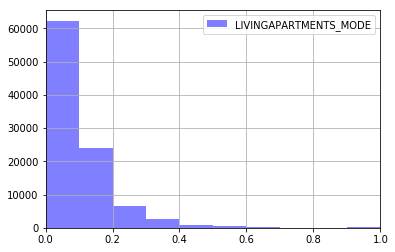

>>> next
column [ LIVINGAREA_MODE ] -  min:  0.0
column [ LIVINGAREA_MODE ] -  max:  1.0
column [ LIVINGAREA_MODE ] - mean:  0.1059750504371198
column [ LIVINGAREA_MODE ] -  std:  0.11184526587783401


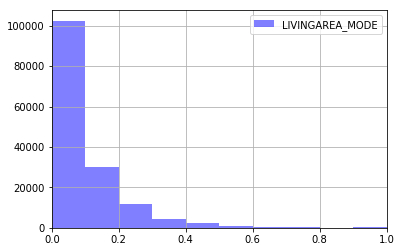

>>> next
column [ NONLIVINGAPARTMENTS_MODE ] -  min:  0.0
column [ NONLIVINGAPARTMENTS_MODE ] -  max:  1.0
column [ NONLIVINGAPARTMENTS_MODE ] - mean:  0.008076387544283468
column [ NONLIVINGAPARTMENTS_MODE ] -  std:  0.04627626621983214


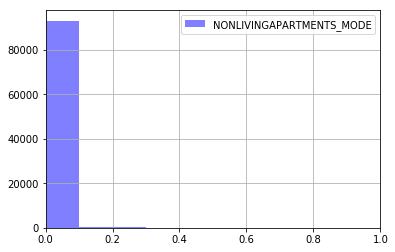

>>> next
column [ NONLIVINGAREA_MODE ] -  min:  0.0
column [ NONLIVINGAREA_MODE ] -  max:  1.0
column [ NONLIVINGAREA_MODE ] - mean:  0.02702231968598884
column [ NONLIVINGAREA_MODE ] -  std:  0.07025385904395566


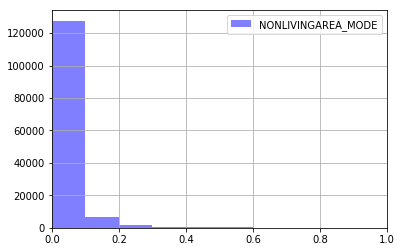

>>> next
column [ APARTMENTS_MEDI ] -  min:  0.0
column [ APARTMENTS_MEDI ] -  max:  1.0
column [ APARTMENTS_MEDI ] - mean:  0.11784992076592354
column [ APARTMENTS_MEDI ] -  std:  0.10907590600115753


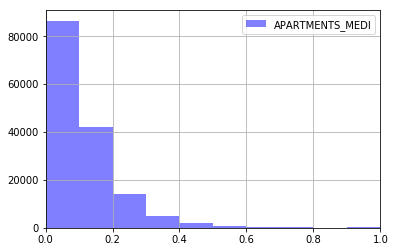

>>> next
column [ BASEMENTAREA_MEDI ] -  min:  0.0
column [ BASEMENTAREA_MEDI ] -  max:  1.0
column [ BASEMENTAREA_MEDI ] - mean:  0.08795485466574764
column [ BASEMENTAREA_MEDI ] -  std:  0.0821787495146414


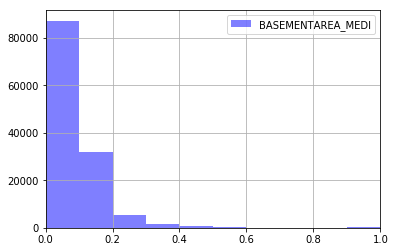

>>> next
column [ YEARS_BEGINEXPLUATATION_MEDI ] -  min:  0.0
column [ YEARS_BEGINEXPLUATATION_MEDI ] -  max:  1.0
column [ YEARS_BEGINEXPLUATATION_MEDI ] - mean:  0.9777522640694213
column [ YEARS_BEGINEXPLUATATION_MEDI ] -  std:  0.05989731850511867


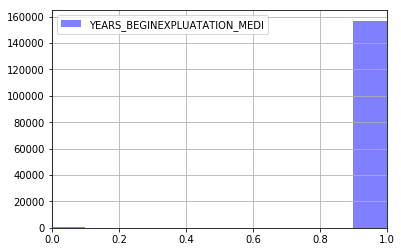

>>> next
column [ YEARS_BUILD_MEDI ] -  min:  0.0
column [ YEARS_BUILD_MEDI ] -  max:  1.0
column [ YEARS_BUILD_MEDI ] - mean:  0.7557462721917102
column [ YEARS_BUILD_MEDI ] -  std:  0.11206630964404966


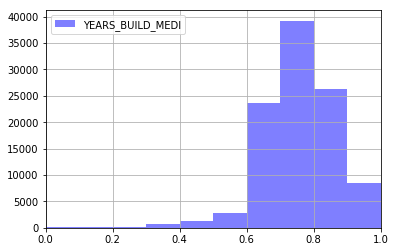

>>> next
column [ COMMONAREA_MEDI ] -  min:  0.0
column [ COMMONAREA_MEDI ] -  max:  1.0
column [ COMMONAREA_MEDI ] - mean:  0.044595101785290435
column [ COMMONAREA_MEDI ] -  std:  0.07614426224091592


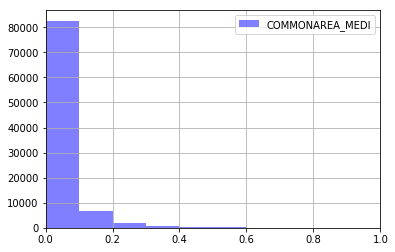

>>> next
column [ ELEVATORS_MEDI ] -  min:  0.0
column [ ELEVATORS_MEDI ] -  max:  1.0
column [ ELEVATORS_MEDI ] - mean:  0.07807784431137002
column [ ELEVATORS_MEDI ] -  std:  0.1344671476907157


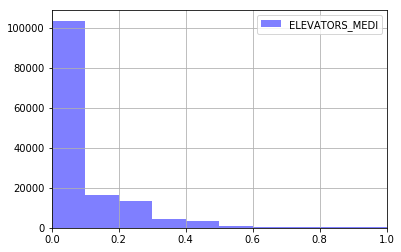

>>> next
column [ ENTRANCES_MEDI ] -  min:  0.0
column [ ENTRANCES_MEDI ] -  max:  1.0
column [ ENTRANCES_MEDI ] - mean:  0.14921278072876187
column [ ENTRANCES_MEDI ] -  std:  0.10036839449766627


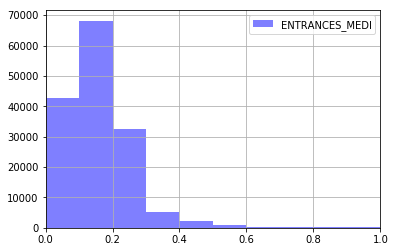

>>> next
column [ FLOORSMAX_MEDI ] -  min:  0.0
column [ FLOORSMAX_MEDI ] -  max:  1.0
column [ FLOORSMAX_MEDI ] - mean:  0.22589659009280993
column [ FLOORSMAX_MEDI ] -  std:  0.14506702591938314


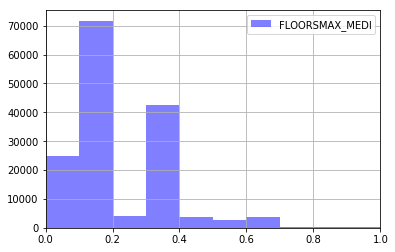

>>> next
column [ FLOORSMIN_MEDI ] -  min:  0.0
column [ FLOORSMIN_MEDI ] -  max:  1.0
column [ FLOORSMIN_MEDI ] - mean:  0.23162493804929254
column [ FLOORSMIN_MEDI ] -  std:  0.1619335414572564


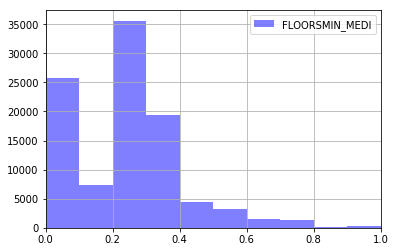

>>> next
column [ LANDAREA_MEDI ] -  min:  0.0
column [ LANDAREA_MEDI ] -  max:  1.0
column [ LANDAREA_MEDI ] - mean:  0.06716874904939986
column [ LANDAREA_MEDI ] -  std:  0.08216701028006211


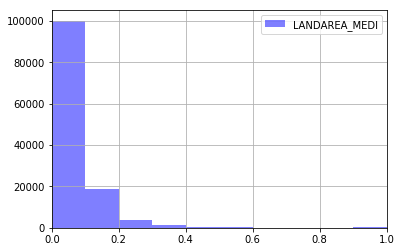

>>> next
column [ LIVINGAPARTMENTS_MEDI ] -  min:  0.0
column [ LIVINGAPARTMENTS_MEDI ] -  max:  1.0
column [ LIVINGAPARTMENTS_MEDI ] - mean:  0.10195447324073251
column [ LIVINGAPARTMENTS_MEDI ] -  std:  0.09364233271154587


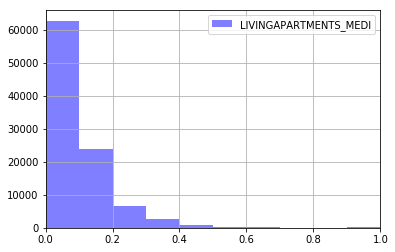

>>> next
column [ LIVINGAREA_MEDI ] -  min:  0.0
column [ LIVINGAREA_MEDI ] -  max:  1.0
column [ LIVINGAREA_MEDI ] - mean:  0.10860673604899224
column [ LIVINGAREA_MEDI ] -  std:  0.11226025867535097


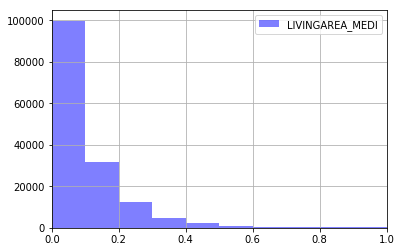

>>> next
column [ NONLIVINGAPARTMENTS_MEDI ] -  min:  0.0
column [ NONLIVINGAPARTMENTS_MEDI ] -  max:  1.0
column [ NONLIVINGAPARTMENTS_MEDI ] - mean:  0.008651013330213151
column [ NONLIVINGAPARTMENTS_MEDI ] -  std:  0.047414727907790825


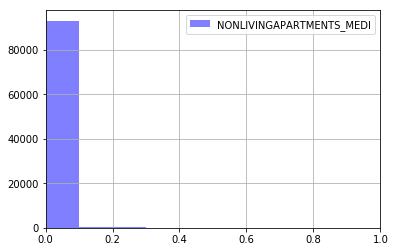

>>> next
column [ NONLIVINGAREA_MEDI ] -  min:  0.0
column [ NONLIVINGAREA_MEDI ] -  max:  1.0
column [ NONLIVINGAREA_MEDI ] - mean:  0.028235920597262987
column [ NONLIVINGAREA_MEDI ] -  std:  0.07016648150680234


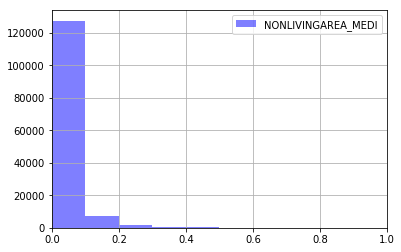

>>> next
column [ TOTALAREA_MODE ] -  min:  0.0
column [ TOTALAREA_MODE ] -  max:  1.0
column [ TOTALAREA_MODE ] - mean:  0.10254666268544003
column [ TOTALAREA_MODE ] -  std:  0.10746232414961776


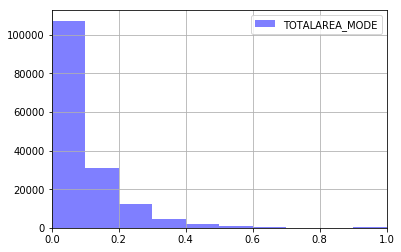

>>> next
column [ OBS_30_CNT_SOCIAL_CIRCLE ] -  min:  0.0
column [ OBS_30_CNT_SOCIAL_CIRCLE ] -  max:  348.0
column [ OBS_30_CNT_SOCIAL_CIRCLE ] - mean:  1.4222454239942575
column [ OBS_30_CNT_SOCIAL_CIRCLE ] -  std:  2.400988746111826


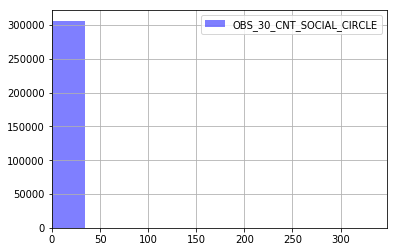

>>> next
column [ DEF_30_CNT_SOCIAL_CIRCLE ] -  min:  0.0
column [ DEF_30_CNT_SOCIAL_CIRCLE ] -  max:  34.0
column [ DEF_30_CNT_SOCIAL_CIRCLE ] - mean:  0.1434206662533851
column [ DEF_30_CNT_SOCIAL_CIRCLE ] -  std:  0.4466984293825373


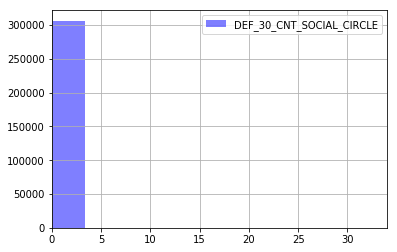

>>> next
column [ OBS_60_CNT_SOCIAL_CIRCLE ] -  min:  0.0
column [ OBS_60_CNT_SOCIAL_CIRCLE ] -  max:  344.0
column [ OBS_60_CNT_SOCIAL_CIRCLE ] - mean:  1.4052921791901856
column [ OBS_60_CNT_SOCIAL_CIRCLE ] -  std:  2.3798033519768955


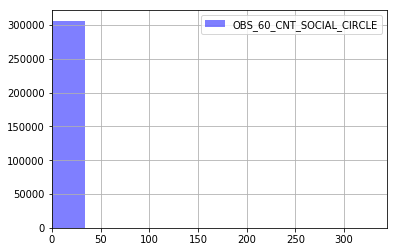

>>> next
column [ DEF_60_CNT_SOCIAL_CIRCLE ] -  min:  0.0
column [ DEF_60_CNT_SOCIAL_CIRCLE ] -  max:  24.0
column [ DEF_60_CNT_SOCIAL_CIRCLE ] - mean:  0.10004894123788705
column [ DEF_60_CNT_SOCIAL_CIRCLE ] -  std:  0.36229080397523755


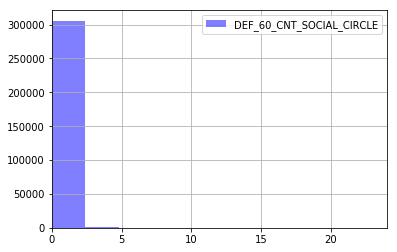

>>> next
column [ DAYS_LAST_PHONE_CHANGE ] -  min:  -4292.0
column [ DAYS_LAST_PHONE_CHANGE ] -  max:  0.0
column [ DAYS_LAST_PHONE_CHANGE ] - mean:  -962.8587883320868
column [ DAYS_LAST_PHONE_CHANGE ] -  std:  826.8084870404405


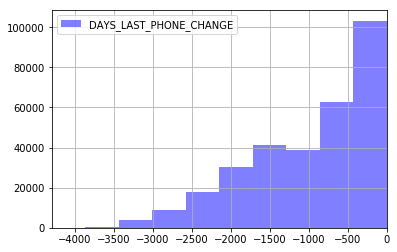

>>> next
column [ AMT_REQ_CREDIT_BUREAU_HOUR ] -  min:  0.0
column [ AMT_REQ_CREDIT_BUREAU_HOUR ] -  max:  4.0
column [ AMT_REQ_CREDIT_BUREAU_HOUR ] - mean:  0.006402448193930645
column [ AMT_REQ_CREDIT_BUREAU_HOUR ] -  std:  0.08384912844777125


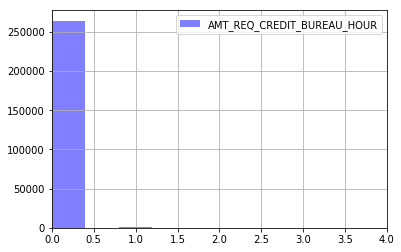

>>> next
column [ AMT_REQ_CREDIT_BUREAU_DAY ] -  min:  0.0
column [ AMT_REQ_CREDIT_BUREAU_DAY ] -  max:  9.0
column [ AMT_REQ_CREDIT_BUREAU_DAY ] - mean:  0.0070002105326475985
column [ AMT_REQ_CREDIT_BUREAU_DAY ] -  std:  0.11075740632418819


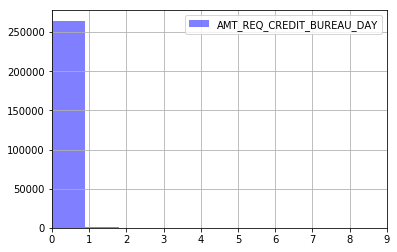

>>> next
column [ AMT_REQ_CREDIT_BUREAU_WEEK ] -  min:  0.0
column [ AMT_REQ_CREDIT_BUREAU_WEEK ] -  max:  8.0
column [ AMT_REQ_CREDIT_BUREAU_WEEK ] - mean:  0.0343619356973142
column [ AMT_REQ_CREDIT_BUREAU_WEEK ] -  std:  0.20468487581284914


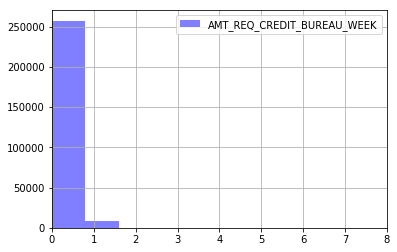

>>> next
column [ AMT_REQ_CREDIT_BUREAU_MON ] -  min:  0.0
column [ AMT_REQ_CREDIT_BUREAU_MON ] -  max:  27.0
column [ AMT_REQ_CREDIT_BUREAU_MON ] - mean:  0.26739526000781977
column [ AMT_REQ_CREDIT_BUREAU_MON ] -  std:  0.9160023961540442


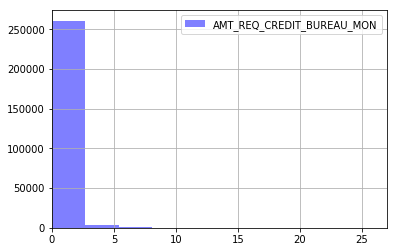

>>> next
column [ AMT_REQ_CREDIT_BUREAU_QRT ] -  min:  0.0
column [ AMT_REQ_CREDIT_BUREAU_QRT ] -  max:  261.0
column [ AMT_REQ_CREDIT_BUREAU_QRT ] - mean:  0.26547414959848414
column [ AMT_REQ_CREDIT_BUREAU_QRT ] -  std:  0.7940556483196873


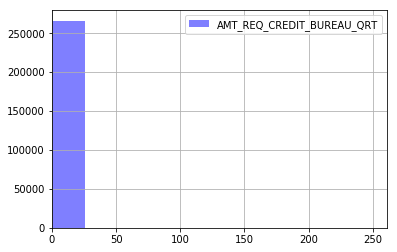

>>> next
column [ AMT_REQ_CREDIT_BUREAU_YEAR ] -  min:  0.0
column [ AMT_REQ_CREDIT_BUREAU_YEAR ] -  max:  25.0
column [ AMT_REQ_CREDIT_BUREAU_YEAR ] - mean:  1.899974435321363
column [ AMT_REQ_CREDIT_BUREAU_YEAR ] -  std:  1.869294998182222


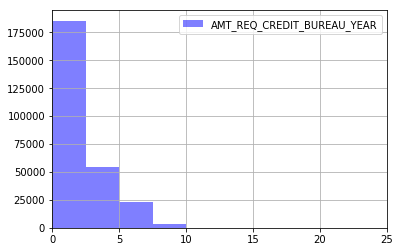

>>> next


In [180]:
# 先篩選數值型的欄位
"""
YOUR CODE HERE, fill correct data types (for example str, float, int, ...)
"""
dtype_select = ['float64', 'int64']
#print(dtype_select)

numeric_columns = list(app_train.columns[list(app_train.dtypes.isin(dtype_select))])
print(numeric_columns)
print(len(numeric_columns))

# 再把只有 2 值 (通常是 0,1) 的欄位去掉]
numeric_columns = list(app_train[numeric_columns].columns[list(app_train[numeric_columns].apply(lambda x:len(x.unique())!=2 ))])
print("Numbers of remain columns: " ,len(numeric_columns))

# 檢視這些欄位的數值範圍
for col in numeric_columns:
    """
    Your CODE HERE, make the box plot
    """
    print('column [', col ,'] -  min: ', app_train[col].min())
    print('column [', col ,'] -  max: ', app_train[col].max())    
    print('column [', col ,'] - mean: ', app_train[col].mean())
    print('column [', col ,'] -  std: ', app_train[col].std())
    app_train[col].hist(color='blue', alpha=0.5, label=col)
    plt.xlim(app_train[col].min(), app_train[col].max())
    plt.legend(loc='best')
    
    
    #app_train[[col]].boxplot(vert=False)
 
    
    plt.show()

    print('>>> next')


In [181]:
# 從上面的圖檢查的結果，至少這三個欄位好像有點可疑

# AMT_INCOME_TOTAL
# REGION_POPULATION_RELATIVE
# OBS_60_CNT_SOCIAL_CIRCLE

# DAYS_REGISTRATION
# OWN_CAR_AGE 
# BASEMENTAREA_AVG
# YEARS_BEGINEXPLUATATION_AVG
# LANDAREA_AVG
# LIVINGAPARTMENTS_AVG
# APARTMENTS_MODE
# BASEMENTAREA_MODE
# YEARS_BEGINEXPLUATATION_MODE
# LANDAREA_MODE
# LIVINGAREA_MODE
# APARTMENTS_MEDI
# BASEMENTAREA_MEDI
# YEARS_BEGINEXPLUATATION_MEDI 
# TOTALAREA_MODE 
# LIVINGAPARTMENTS_MEDI
# LANDAREA_MEDI

### Hints: Emprical Cumulative Density Plot, [ECDF](https://zh.wikipedia.org/wiki/%E7%BB%8F%E9%AA%8C%E5%88%86%E5%B8%83%E5%87%BD%E6%95%B0), [ECDF with Python](https://stackoverflow.com/questions/14006520/ecdf-in-python-without-step-function)

count    3.075110e+05
mean     1.687979e+05
std      2.371231e+05
min      2.565000e+04
25%      1.125000e+05
50%      1.471500e+05
75%      2.025000e+05
max      1.170000e+08
Name: AMT_INCOME_TOTAL, dtype: float64


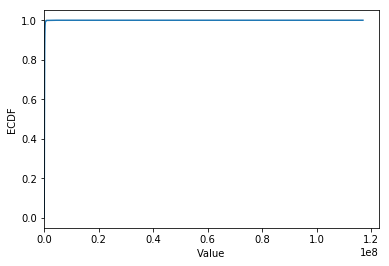

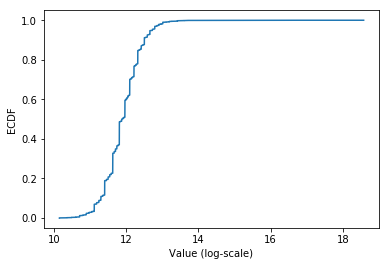

In [182]:
# 最大值離平均與中位數很遠
print(app_train['AMT_INCOME_TOTAL'].describe())

# 繪製 Empirical Cumulative Density Plot (ECDF)
"""
YOUR CODE HERE
"""
def ecdf(data):
    x = np.sort(data)
    y = np.arange(1, len(x)+1) / len(x)
    return (x,y)

x, y = ecdf( app_train['AMT_INCOME_TOTAL'])
cdf = pd.Series(y, index=x)
#print(cdf)

plt.plot(list(cdf.index), cdf/cdf.max())
plt.xlabel('Value')
plt.ylabel('ECDF')
plt.xlim([cdf.index.min(), cdf.index.max() * 1.05]) # 限制顯示圖片的範圍
plt.ylim([-0.05,1.05]) # 限制顯示圖片的範圍

plt.show()

# 改變 y 軸的 Scale, 讓我們可以正常檢視 ECDF
plt.plot(np.log(list(cdf.index)), cdf/cdf.max())
plt.xlabel('Value (log-scale)')
plt.ylabel('ECDF')

plt.ylim([-0.05,1.05]) # 限制顯示圖片的範圍

plt.show()

## 補充：Normal dist 的 ECDF
![ecdf_normal](https://au.mathworks.com/help/examples/stats/win64/PlotEmpiricalCdfAndCompareWithSamplingDistributionExample_01.png)

count    307511.000000
mean          0.020868
std           0.013831
min           0.000290
25%           0.010006
50%           0.018850
75%           0.028663
max           0.072508
Name: REGION_POPULATION_RELATIVE, dtype: float64


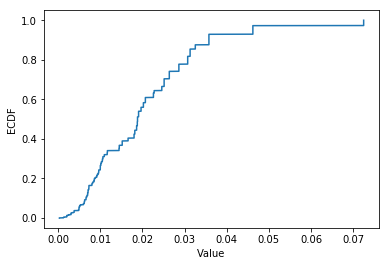

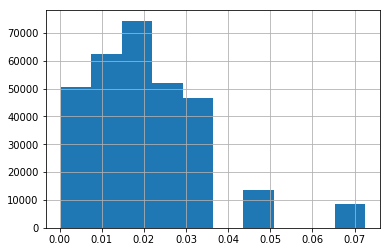

0.035792    16408
0.046220    13442
0.030755    12163
0.025164    11950
0.026392    11601
0.031329    11321
0.028663    11157
0.019101     8694
0.072508     8412
0.020713     8066
0.018850     7668
0.020246     7178
0.018634     7038
0.022625     6943
0.015221     6824
0.032561     6636
0.024610     6404
0.019689     6172
0.018029     6167
0.018801     6108
0.018209     6052
0.014520     4785
0.016612     4408
0.007020     4105
0.022800     3807
0.010032     3570
0.010006     3563
0.014464     3422
0.004960     3300
0.011703     3252
            ...  
0.006008     1796
0.003069     1783
0.008575     1763
0.008474     1740
0.007274     1724
0.007114     1684
0.006305     1672
0.008068     1668
0.008866     1654
0.006671     1653
0.002042     1642
0.003813     1616
0.005084     1482
0.006296     1225
0.005313     1218
0.003818     1212
0.003122     1147
0.006233     1087
0.005002     1068
0.002134     1051
0.004849     1038
0.005144      967
0.002506      944
0.003541      627
0.001276  

In [183]:
# 最大值落在分布之外
print(app_train['REGION_POPULATION_RELATIVE'].describe())

# 繪製 Empirical Cumulative Density Plot (ECDF)
"""
Your Code Here
"""
x, y = ecdf( app_train['REGION_POPULATION_RELATIVE'])
cdf = pd.Series(y, index=x)


plt.plot(list(cdf.index), cdf/cdf.max())
plt.xlabel('Value')
plt.ylabel('ECDF')
plt.ylim([-0.05,1.05]) # 限制顯示圖片的範圍
plt.show()

app_train['REGION_POPULATION_RELATIVE'].hist()
plt.show()

app_train['REGION_POPULATION_RELATIVE'].value_counts()

# 就以這個欄位來說，雖然有資料掉在分布以外，也不算異常，僅代表這間公司在稍微熱鬧的地區有的據點較少，
# 導致 region population relative 在少的部分較為密集，但在大的部分較為疏漏

count    306490.000000
mean          1.405292
std           2.379803
min           0.000000
25%           0.000000
50%           0.000000
75%           2.000000
max         344.000000
Name: OBS_60_CNT_SOCIAL_CIRCLE, dtype: float64


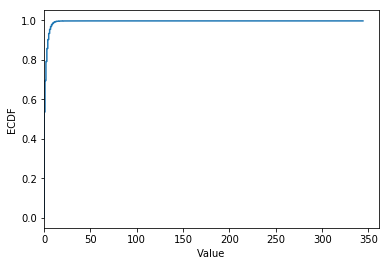

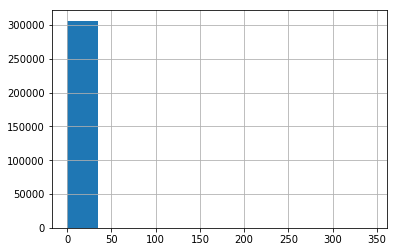

344.0         1
47.0          1
30.0          1
29.0          2
28.0          1
27.0          5
26.0          1
25.0         11
24.0         12
23.0         13
22.0         20
21.0         28
20.0         30
19.0         44
18.0         49
17.0         73
16.0        137
15.0        166
14.0        238
13.0        401
12.0        620
11.0        837
10.0       1335
9.0        1959
8.0        2886
7.0        4344
6.0        6349
5.0        9463
4.0       13946
3.0       20215
2.0       29766
1.0       48870
0.0      164666
Name: OBS_60_CNT_SOCIAL_CIRCLE, dtype: int64


In [184]:
# 最大值落在分布之外
print(app_train['OBS_60_CNT_SOCIAL_CIRCLE'].describe())

# 繪製 Empirical Cumulative Density Plot (ECDF)
"""
Your Code Here
"""
x, y = ecdf( app_train['OBS_60_CNT_SOCIAL_CIRCLE'])
cdf = pd.Series(y, index=x)

plt.plot(list(cdf.index), cdf/cdf.max())
plt.xlabel('Value')
plt.ylabel('ECDF')
plt.xlim([cdf.index.min() * 0.95, cdf.index.max() * 1.05])
plt.ylim([-0.05,1.05]) # 限制顯示圖片的範圍
plt.show()


app_train['OBS_60_CNT_SOCIAL_CIRCLE'].hist()
plt.show()
print(app_train['OBS_60_CNT_SOCIAL_CIRCLE'].value_counts().sort_index(ascending = False))

## 注意：當 histogram 畫出上面這種圖 (只出現一條，但是 x 軸延伸很長導致右邊有一大片空白時，代表右邊有值但是數量稀少。這時可以考慮用 value_counts 去找到這些數值

True     306364
False      1147
Name: OBS_60_CNT_SOCIAL_CIRCLE, dtype: int64
RangeIndex(start=0, stop=307511, step=1)
[ True  True  True ...  True  True  True]


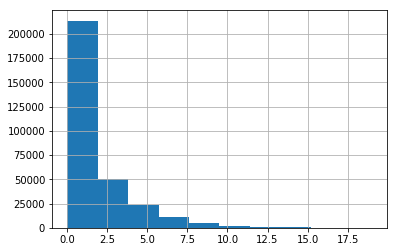

In [185]:
# 把一些極端值暫時去掉，在繪製一次 Histogram
# 選擇 OBS_60_CNT_SOCIAL_CIRCLE 小於 20 的資料點繪製
"""
Your Code Here
"""
#app_train['OBS_60_CNT_SOCIAL_CIRCLE'].value_counts() < 20
#print(a)      

loc_a = app_train['OBS_60_CNT_SOCIAL_CIRCLE'] < 20
loc_b = 'OBS_60_CNT_SOCIAL_CIRCLE'

print(loc_a.value_counts())
print(loc_a.index)
print(loc_a.values)

app_train.loc[loc_a, loc_b].hist()
plt.show()